In [2]:
from pathlib import Path
import arviz as az

In [3]:
trace = az.from_netcdf(Path("./") / "models/methods/metropolis" / "trace.nc")
trace

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data
	> constant_data

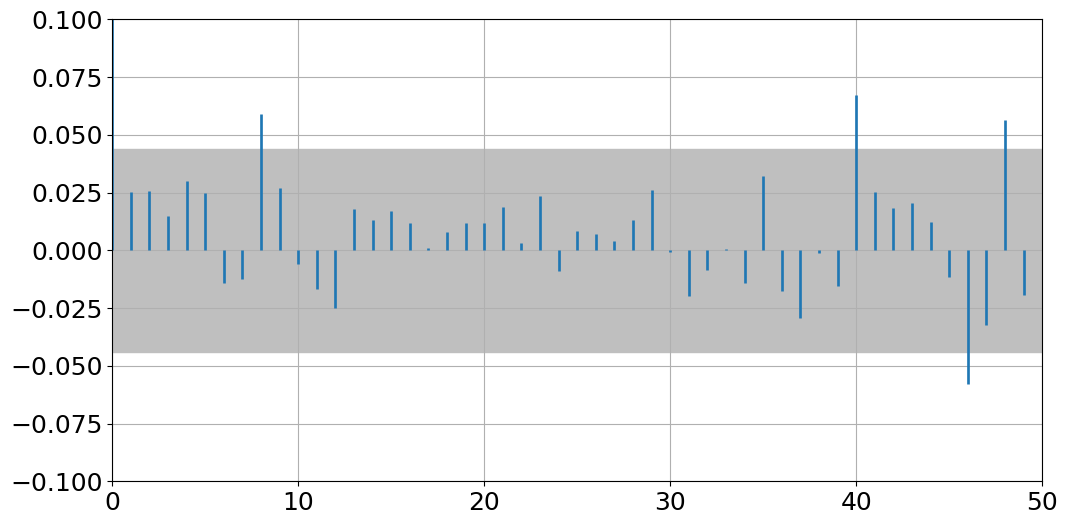

In [33]:
import arviz.labels as azl

trace = az.from_netcdf(Path("./") / "models/methods/fullrank_advi" / "trace.nc")
labeller = azl.MapLabeller(var_name_map={"lt_0 - slope": ""})
ax = az.plot_autocorr(
    trace,
    var_names=["lt_0 - slope"],
    combined=True,
    max_lag=50,
    figsize=(12, 6),
    textsize=18,
    labeller=labeller
)
ax.set_ylim(-0.1, 0.1)
ax.grid()

In [34]:
nuts_trace = az.from_netcdf(Path("./") / "models/methods/nuts" / "trace.nc")
advi_trace = az.from_netcdf(Path("./") / "models/methods/advi" / "trace.nc")
fradvi_trace = az.from_netcdf(Path("./") / "models/methods/fullrank_advi" / "trace.nc")

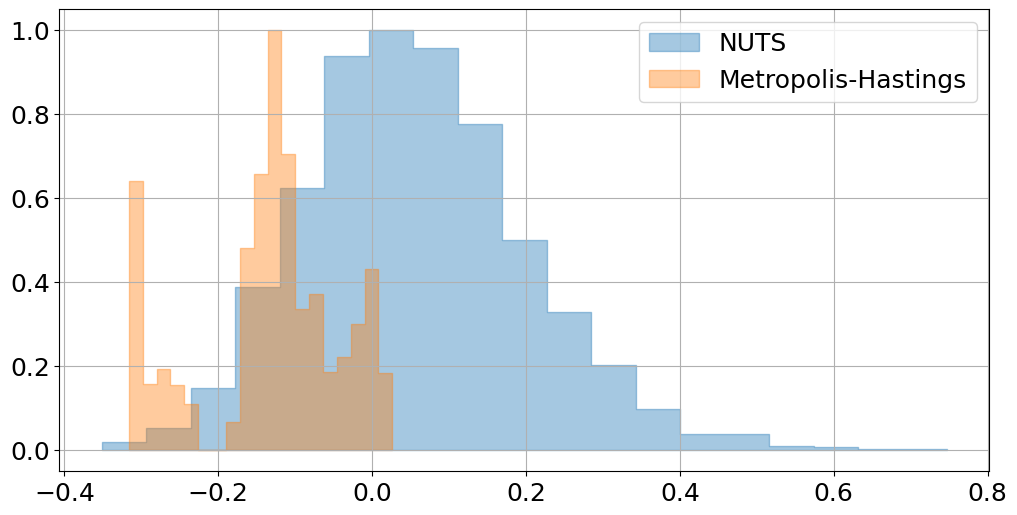

In [48]:
import matplotlib.pyplot as plt
import numpy as np

nuts_trace = az.from_netcdf(Path("./") / "models/methods/nuts" / "trace.nc")[
    "posterior"
]["lt_0 - slope"].to_numpy()
mh_trace = az.from_netcdf(Path("./") / "models/methods/metropolis" / "trace.nc")[
    "posterior"
]["lt_0 - slope"].to_numpy()
advi_trace = az.from_netcdf(Path("./") / "models/methods/advi" / "trace.nc")[
    "posterior"
]["lt_0 - slope"].to_numpy()
fradvi_trace = az.from_netcdf(Path("./") / "models/methods/fullrank_advi" / "trace.nc")[
    "posterior"
]["lt_0 - slope"].to_numpy()

cnt_bins = 20

plt.figure(figsize=(12, 6))

counts, bins = np.histogram(nuts_trace.flatten(), bins=cnt_bins)
plt.fill_between(
    bins[1:],
    counts / counts.max(),
    step="pre",
    alpha=0.4,
    color=f"C{0}",
    label="NUTS",
)

counts, bins = np.histogram(mh_trace.flatten(), bins=cnt_bins)
plt.fill_between(
    bins[1:],
    counts / counts.max(),
    step="pre",
    alpha=0.4,
    color=f"C{1}",
    label="Metropolis-Hastings",
)

# counts, bins = np.histogram(advi_trace.flatten(), bins=cnt_bins)
# plt.fill_between(
#     bins[1:],
#     counts / counts.max(),
#     step="pre",
#     alpha=0.4,
#     color=f"C{1}",
#     label="ADVI",
# )

# counts, bins = np.histogram(fradvi_trace.flatten(), bins=cnt_bins)
# plt.fill_between(
#     bins[1:],
#     counts / counts.max(),
#     step="pre",
#     alpha=0.4,
#     color=f"C{2}",
#     label="FullRank ADVI",
# )

plt.grid()
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=18)
